**Load and Normalize Data**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for normalizing pixel values
normalize_train = ImageDataGenerator(rescale=1./255)
normalize_test = ImageDataGenerator(rescale=1./255)

# Load train data using ImageDataGenerator
train_data = normalize_train.flow_from_directory(
    r"C:\Users\aethe\Desktop\work\EDA\dataset\train",
    target_size=(150, 150),
    batch_size=15,
    class_mode='binary'    
)

# Load test data using ImageDataGenerator
test_data = normalize_test.flow_from_directory(
    r"C:\Users\aethe\Desktop\work\EDA\dataset\test",
    target_size=(150, 150),
    batch_size=15,
    class_mode='binary'
)

# Divide data into x_train, y_train, x_test, y_test
x_train, y_train = next(train_data)
x_test, y_test = next(test_data)

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

# Display shapes of the divided data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)



Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Shape of x_train: (15, 150, 150, 3, 1)
Shape of y_train: (15,)
Shape of x_test: (6, 150, 150, 3, 1)
Shape of y_test: (6,)


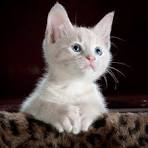

In [2]:
import PIL
from pathlib import Path

dir = r'C:\Users\aethe\Desktop\work\EDA\dataset\train'

dir_path = Path(dir)

images = list(dir_path.glob('cat\*'))

PIL.Image.open(images[0])

**Sequential layer**

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

**Implement optimizer and fit the model**

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=15, validation_data=(x_test, y_test), verbose=2)

Epoch 1/3
1/1 - 1s - loss: 0.6042 - accuracy: 0.6000 - val_loss: 0.6913 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 2/3
1/1 - 0s - loss: 0.5938 - accuracy: 0.6000 - val_loss: 0.7520 - val_accuracy: 0.5000 - 188ms/epoch - 188ms/step
Epoch 3/3
1/1 - 0s - loss: 0.5903 - accuracy: 0.6000 - val_loss: 0.6738 - val_accuracy: 0.5000 - 184ms/epoch - 184ms/step


**----------------------------------------------------------------------------------------------------------------------------------------------------------**

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

TensorFlow version: 2.15.0


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=15, validation_data=(x_test, y_test), verbose=2)

Epoch 1/5
1/1 - 1s - loss: 0.6887 - accuracy: 0.5333 - val_loss: 4.7092 - val_accuracy: 0.5000 - 1s/epoch - 1s/step
Epoch 2/5
1/1 - 0s - loss: 3.0271 - accuracy: 0.6000 - val_loss: 1.3369 - val_accuracy: 0.5000 - 361ms/epoch - 361ms/step
Epoch 3/5
1/1 - 0s - loss: 1.5185 - accuracy: 0.4000 - val_loss: 0.6527 - val_accuracy: 0.6667 - 373ms/epoch - 373ms/step
Epoch 4/5
1/1 - 0s - loss: 0.6057 - accuracy: 0.9333 - val_loss: 0.9853 - val_accuracy: 0.5000 - 409ms/epoch - 409ms/step
Epoch 5/5
1/1 - 0s - loss: 0.6704 - accuracy: 0.6000 - val_loss: 0.7237 - val_accuracy: 0.5000 - 377ms/epoch - 377ms/step


**--------------------------------------------------------------------------------------------------------------------------------**

**sqeuential layer using Transfer learning**

In [11]:
import keras
from keras import layers

# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1, activation='softmax'),  # Change the number of units to 1
])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=15, validation_data=(x_test, y_test), verbose=2)

Epoch 1/3
1/1 - 4s - loss: 1.0794 - accuracy: 0.4000 - val_loss: 0.8821 - val_accuracy: 0.5000 - 4s/epoch - 4s/step
Epoch 2/3
1/1 - 0s - loss: 1.0080 - accuracy: 0.4000 - val_loss: 0.8425 - val_accuracy: 0.5000 - 483ms/epoch - 483ms/step
Epoch 3/3
1/1 - 0s - loss: 0.9587 - accuracy: 0.4000 - val_loss: 0.8106 - val_accuracy: 0.5000 - 479ms/epoch - 479ms/step
